In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
sa_crimes = pd.read_csv("SA_Data.csv", delimiter=';')
sa_crimes.head()

,_id,Report_ID,Report_Date,NIBRS_Code_Name,NIBRS_Crime_Against,Service_Area,NIBRS_Group,Zip_Code,DateTime
0,1,45000634662,2023-03-05,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01
1,2,53896892246,2024-01-25,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01
2,3,55602801987,2024-04-19,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01
3,4,58290386300,2024-08-10,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01
4,5,63379733088,2025-03-28,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01


In [2]:
sa_crimes.dtypes

_id                     int64
Report_ID               int64
Report_Date            object
NIBRS_Code_Name        object
NIBRS_Crime_Against    object
Service_Area           object
NIBRS_Group            object
Zip_Code               object
DateTime               object
dtype: object

In [3]:
# Convert report date to datetime
sa_crimes['Report_Date'] = pd.to_datetime(sa_crimes['Report_Date'])

In [4]:
#Check for missing data
sa_crimes.isna().sum()

_id                    0
Report_ID              0
Report_Date            0
NIBRS_Code_Name        0
NIBRS_Crime_Against    0
Service_Area           0
NIBRS_Group            0
Zip_Code               0
DateTime               0
dtype: int64

In [5]:
#Check duplicate values
sa_crimes.duplicated().sum()

0

In [6]:
sa_crimes.duplicated().value_counts()

False    394239
Name: count, dtype: int64

In [7]:
sa_crimes.describe()

,_id,Report_ID,Report_Date
count,394239.000000,3.942390e+05,394239
mean,197120.000000,5.550395e+10,2024-04-03 01:27:17.837960960
min,1.000000,1.628253e+10,2023-01-01 00:00:00
25%,98560.500000,5.188929e+10,2023-08-14 00:00:00
50%,197120.000000,5.505829e+10,2024-03-29 00:00:00
75%,295679.500000,6.081927e+10,2024-11-14 00:00:00
max,394239.000000,6.521967e+10,2025-07-31 00:00:00
std,113807.140725,6.172600e+09,NaN


In [8]:
sa_crimes.head()

,_id,Report_ID,Report_Date,NIBRS_Code_Name,NIBRS_Crime_Against,Service_Area,NIBRS_Group,Zip_Code,DateTime
0,1,45000634662,2023-03-05,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01
1,2,53896892246,2024-01-25,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01
2,3,55602801987,2024-04-19,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01
3,4,58290386300,2024-08-10,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01
4,5,63379733088,2025-03-28,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01


# EDA

1) Are there months in which crime increases?
2) Days of the week with most crime
3) Do crime rates change by zipcode?
4) Which Areas have highest/lowest crime rate?

# EDA on type of crimes

# SA Crime time series 2023-2025

In [9]:
# Check seasonality of crimes
sa_crimes['month'] = pd.to_datetime(sa_crimes['Report_Date'])

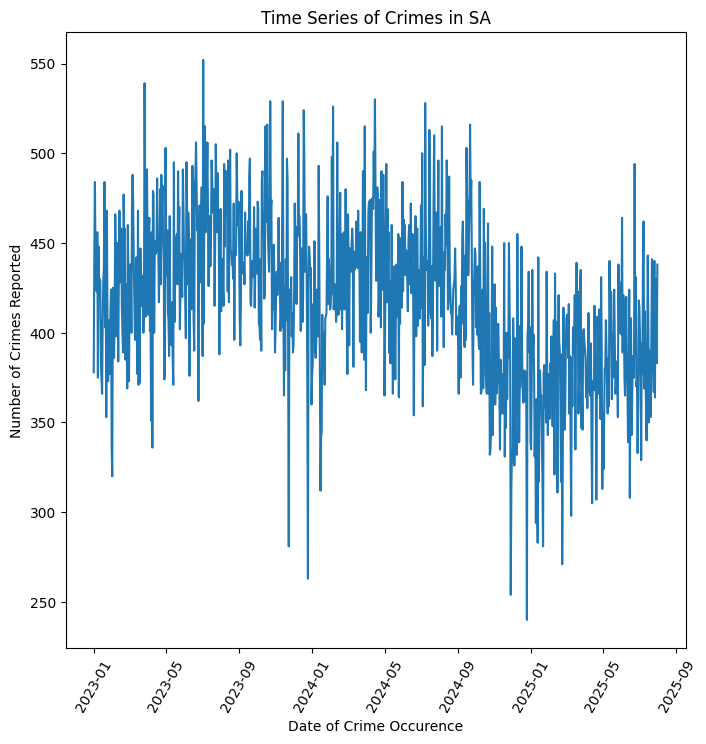

In [10]:
import seaborn as sns
# Time distribution 
event_counts =sa_crimes.groupby('Report_Date').size().reset_index(name='count')

plt.figure(figsize=(8,8))

sns.lineplot(data= event_counts, x='Report_Date', y='count')
plt.xlabel('Date of Crime Occurence')
plt.ylabel('Number of Crimes Reported')
plt.xticks(rotation=60)
plt.title('Time Series of Crimes in SA')
plt.show()

In [11]:
average_crime = round(event_counts['count'].mean())

print(f'Average number of crimes per day in San Antonio is {average_crime} crimes per day')

Average number of crimes per day in San Antonio is 418 crimes per day


In [12]:
crime_count = event_counts['count'].value_counts()

In [13]:
crime_count

count
441    13
389    13
398    12
400    12
448    11
       ..
337     1
344     1
357     1
254     1
329     1
Name: count, Length: 207, dtype: int64

In [14]:
event_counts.head()

,Report_Date,count
0,2023-01-01,378
1,2023-01-02,441
2,2023-01-03,484
3,2023-01-04,443
4,2023-01-05,427


In [15]:
import plotly.graph_objects as go

fig = px.line(event_counts, x='Report_Date', y='count', title='Crime in San Antonio 2023-2025', markers=True)

fig.show()

## Crime by months

In [36]:
sa_crimes.head()

,_id,Report_ID,Report_Date,NIBRS_Code_Name,NIBRS_Crime_Against,Service_Area,NIBRS_Group,Zip_Code,DateTime,month,ZIP_LAT,ZIP_LON,Week Day
0,1,45000634662,2023-03-05,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,March,29.4167,-98.4722,Sunday
1,2,53896892246,2024-01-25,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01,January,29.4167,-98.4722,Thursday
2,3,55602801987,2024-04-19,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,April,29.4167,-98.4722,Friday
3,4,58290386300,2024-08-10,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01,August,29.4167,-98.4722,Saturday
4,5,63379733088,2025-03-28,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,March,29.4167,-98.4722,Friday


In [44]:
# Extract months for better interpretability
sa_crimes['month'] = sa_crimes['Report_Date'].dt.month_name()

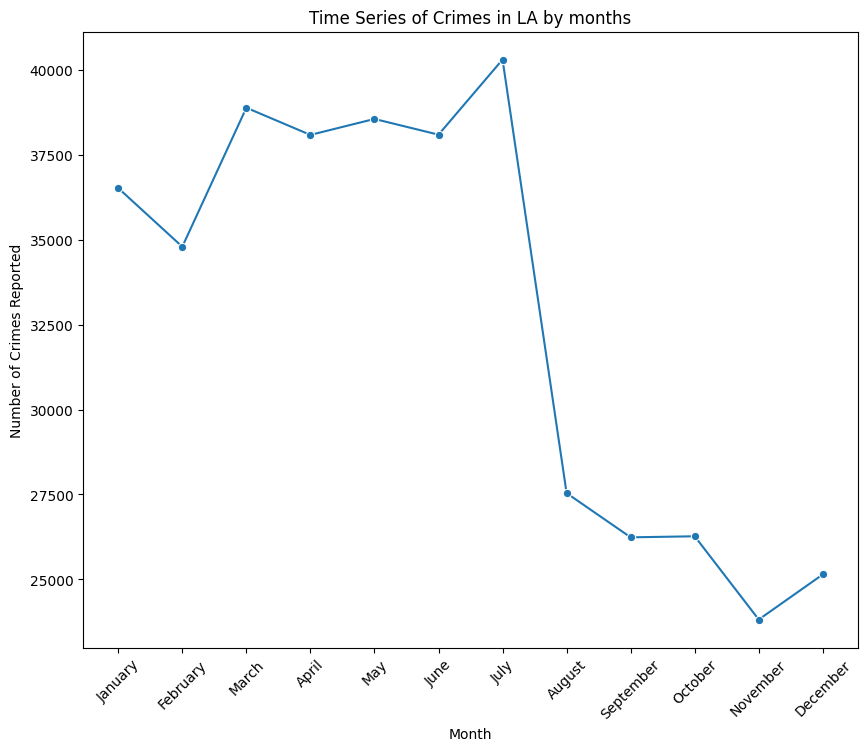

In [45]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

event_counts = sa_crimes.groupby('month').size().reset_index(name='count')


event_counts['month'] = pd.Categorical(event_counts['month'], 
                                       categories=month_order, 
                                       ordered=True)


event_counts = event_counts.sort_values('month')

plt.figure(figsize=(10,8))

sns.lineplot(data=event_counts, x='month',y='count',marker='o')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Crimes Reported')
plt.title('Time Series of Crimes in LA by months')
plt.show()

## Bug

I will have to split this by year since there is a clear down trend my guy 

# Crime by Days of the week


In [47]:
# Extract months for better interpretability
sa_crimes['Day'] = sa_crimes['Report_Date'].dt.day_name()

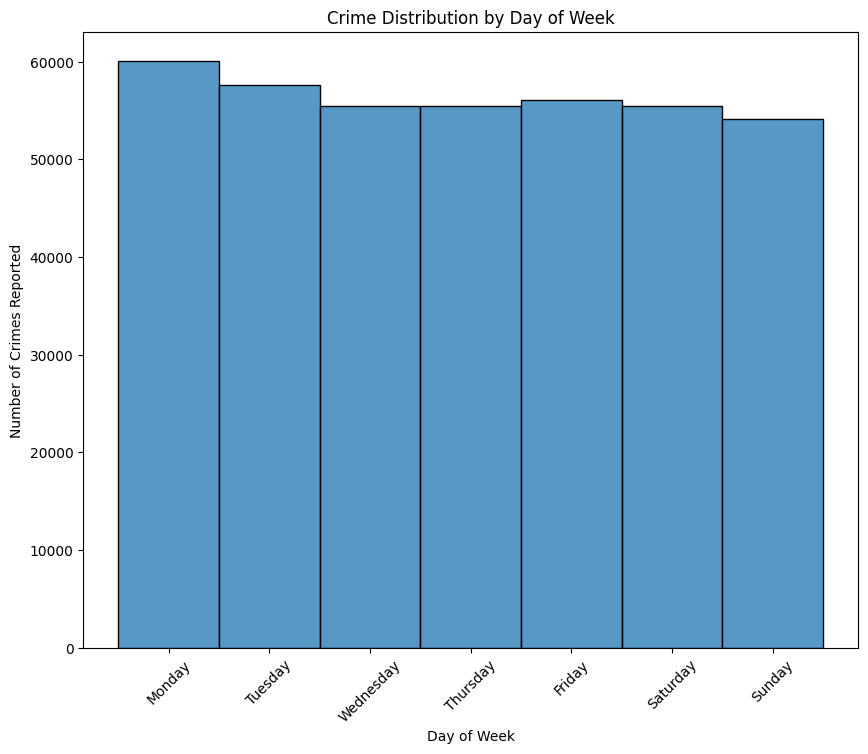

In [48]:
# Define the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                 'Friday', 'Saturday', 'Sunday']

# Convert to categorical with proper order
sa_crimes['Day'] = pd.Categorical(sa_crimes['Day'], 
                                       categories=weekday_order, 
                                       ordered=True)

plt.figure(figsize=(10,8))
sns.histplot(data=sa_crimes, x='Day')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Number of Crimes Reported')
plt.title('Crime Distribution by Day of Week')
plt.show()

# Crimes by zipcode

In [16]:
# 3: Crimes by zipcode
sa_crimes['Zip_Code'].value_counts(normalize=True)

Zip_Code
78216    0.052088
78207    0.045665
78223    0.038378
78228    0.036105
78227    0.034050
           ...   
78263    0.000015
78206    0.000013
78284    0.000008
78279    0.000005
78246    0.000003
Name: proportion, Length: 69, dtype: float64

In [17]:
sa_crimes.head()

,_id,Report_ID,Report_Date,NIBRS_Code_Name,NIBRS_Crime_Against,Service_Area,NIBRS_Group,Zip_Code,DateTime,month
0,1,45000634662,2023-03-05,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,2023-03-05
1,2,53896892246,2024-01-25,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01,2024-01-25
2,3,55602801987,2024-04-19,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,2024-04-19
3,4,58290386300,2024-08-10,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01,2024-08-10
4,5,63379733088,2025-03-28,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,2025-03-28


In [18]:
sa_crimes['Zip_Code'].value_counts()

Zip_Code
78216    20535
78207    18003
78223    15130
78228    14234
78227    13424
         ...  
78263        6
78206        5
78284        3
78279        2
78246        1
Name: count, Length: 69, dtype: int64

In [19]:
# Getting unique zipcodes to find their corresponding coordinates so I can map this data
sa_crimes['Zip_Code'].unique()

array(['78201', '78202', '78203', '78204', '78205', '78207', '78208',
       '78209', '78210', '78211', '78212', '78213', '78214', '78215',
       '78216', '78217', '78218', '78219', '78220', '78221', '78222',
       '78223', '78224', '78225', '78226', '78227', '78228', '78229',
       '78230', '78231', '78232', '78233', '78235', '78236', '78237',
       '78238', '78239', '78240', '78242', '78243', '78244', '78245',
       '78247', '78248', '78249', '78250', '78251', '78252', '78253',
       '78254', '78255', '78256', '78257', '78258', '78259', '78260',
       '78261', '78264', '78266', '78288', 'Not Listed',
       'Out of Jurisdiction', '78241', '78234', '78284', '78263', '78279',
       '78206', '78246'], dtype=object)

# Used AI to help me extract longitude and latitude coordinates using zipcodes in San Antonio. 

In [20]:
import numpy as np
import pandas as pd
import math

# ---- your provided ZIP values ----
zip_values = np.array([
    '78201','78202','78203','78204','78205','78207','78208','78209','78210','78211',
    '78212','78213','78214','78215','78216','78217','78218','78219','78220','78221',
    '78222','78223','78224','78225','78226','78227','78228','78229','78230','78231',
    '78232','78233','78235','78236','78237','78238','78239','78240','78242','78243',
    '78244','78245','78247','78248','78249','78250','78251','78252','78253','78254',
    '78255','78256','78257','78258','78259','78260','78261','78264','78266','78288',
    'Not Listed','Out of Jurisdiction','78241','78234','78284','78263','78279','78206','78246'
], dtype=object)

# ---- STATIC centroid dict (copied/extended from your earlier dict; unknowns -> NaN) ----
sa_zip_coords = {
    '78201': {'ZIP_LAT': 29.4167, 'ZIP_LON': -98.4722},
    '78202': {'ZIP_LAT': 29.4308, 'ZIP_LON': -98.4625},
    '78203': {'ZIP_LAT': 29.3958, 'ZIP_LON': -98.4789},
    '78204': {'ZIP_LAT': 29.3847, 'ZIP_LON': -98.5153},
    '78205': {'ZIP_LAT': 29.4419, 'ZIP_LON': -98.4950},
    '78207': {'ZIP_LAT': 29.4631, 'ZIP_LON': -98.5264},
    '78208': {'ZIP_LAT': 29.4697, 'ZIP_LON': -98.4464},
    '78209': {'ZIP_LAT': 29.4958, 'ZIP_LON': -98.4636},
    '78210': {'ZIP_LAT': 29.3644, 'ZIP_LON': -98.4706},
    '78211': {'ZIP_LAT': 29.4014, 'ZIP_LON': -98.5464},
    '78212': {'ZIP_LAT': 29.4742, 'ZIP_LON': -98.4903},
    '78213': {'ZIP_LAT': 29.5131, 'ZIP_LON': -98.5097},
    '78214': {'ZIP_LAT': 29.3594, 'ZIP_LON': -98.5236},
    '78215': {'ZIP_LAT': 29.4361, 'ZIP_LON': -98.4547},
    '78216': {'ZIP_LAT': 29.5242, 'ZIP_LON': -98.4656},
    '78217': {'ZIP_LAT': 29.5306, 'ZIP_LON': -98.4236},
    '78218': {'ZIP_LAT': 29.5053, 'ZIP_LON': -98.3953},
    '78219': {'ZIP_LAT': 29.4492, 'ZIP_LON': -98.4183},
    '78220': {'ZIP_LAT': 29.4075, 'ZIP_LON': -98.4308},
    '78221': {'ZIP_LAT': 29.3478, 'ZIP_LON': -98.4658},
    '78222': {'ZIP_LAT': 29.3661, 'ZIP_LON': -98.4253},
    '78223': {'ZIP_LAT': 29.3428, 'ZIP_LON': -98.4972},
    '78224': {'ZIP_LAT': 29.3200, 'ZIP_LON': -98.4583},
    '78225': {'ZIP_LAT': 29.3481, 'ZIP_LON': -98.5406},
    '78226': {'ZIP_LAT': 29.4067, 'ZIP_LON': -98.5831},
    '78227': {'ZIP_LAT': 29.4317, 'ZIP_LON': -98.5658},
    '78228': {'ZIP_LAT': 29.4622, 'ZIP_LON': -98.5831},
    '78229': {'ZIP_LAT': 29.5144, 'ZIP_LON': -98.5681},
    '78230': {'ZIP_LAT': 29.4906, 'ZIP_LON': -98.6131},
    '78231': {'ZIP_LAT': 29.5250, 'ZIP_LON': -98.5069},
    '78232': {'ZIP_LAT': 29.5597, 'ZIP_LON': -98.4664},
    '78233': {'ZIP_LAT': 29.5458, 'ZIP_LON': -98.3958},
    '78234': {'ZIP_LAT': 29.4864, 'ZIP_LON': -98.3586},
    '78235': {'ZIP_LAT': 29.4425, 'ZIP_LON': -98.6447},
    '78236': {'ZIP_LAT': 29.4111, 'ZIP_LON': -98.6375},
    '78237': {'ZIP_LAT': 29.3556, 'ZIP_LON': -98.5958},
    '78238': {'ZIP_LAT': 29.3306, 'ZIP_LON': -98.5597},
    '78239': {'ZIP_LAT': 29.4514, 'ZIP_LON': -98.3447},
    '78240': {'ZIP_LAT': 29.5631, 'ZIP_LON': -98.5381},
    '78241': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},  # placeholder
    '78242': {'ZIP_LAT': 29.3708, 'ZIP_LON': -98.3831},
    '78243': {'ZIP_LAT': 29.0000, 'ZIP_LON': -98.0000},   # placeholder
    '78244': {'ZIP_LAT': 29.3844, 'ZIP_LON': -98.3492},
    '78245': {'ZIP_LAT': 29.3294, 'ZIP_LON': -98.6431},
    '78246': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},  # placeholder
    '78247': {'ZIP_LAT': 29.5806, 'ZIP_LON': -98.4831},
    '78248': {'ZIP_LAT': 29.5578, 'ZIP_LON': -98.5853},
    '78249': {'ZIP_LAT': 29.5247, 'ZIP_LON': -98.6264},
    '78250': {'ZIP_LAT': 29.4833, 'ZIP_LON': -98.6581},
    '78251': {'ZIP_LAT': 29.4239, 'ZIP_LON': -98.6981},
    '78252': {'ZIP_LAT': 29.5331, 'ZIP_LON': -98.6581},
    '78253': {'ZIP_LAT': 29.4622, 'ZIP_LON': -98.6997},
    '78254': {'ZIP_LAT': 29.5331, 'ZIP_LON': -98.7131},
    '78255': {'ZIP_LAT': 29.5831, 'ZIP_LON': -98.5331},
    '78256': {'ZIP_LAT': 29.5556, 'ZIP_LON': -98.6331},
    '78257': {'ZIP_LAT': 29.6331, 'ZIP_LON': -98.4831},
    '78258': {'ZIP_LAT': 29.5831, 'ZIP_LON': -98.4331},
    '78259': {'ZIP_LAT': 29.6131, 'ZIP_LON': -98.5831},
    '78260': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},  # unknowns below
    '78261': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78263': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78264': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78266': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78279': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78284': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78288': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
    '78206': {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan},
}

# ---- build a coords table for exactly the items you care about ----
all_zips = pd.Series(zip_values).astype(str).str.strip().str.upper()
coords_rows = []
for z in all_zips:
    if z.isdigit() and len(z) == 5:
        entry = sa_zip_coords.get(z, {'ZIP_LAT': math.nan, 'ZIP_LON': math.nan})
        coords_rows.append({'Zip_Code': z, **entry})
    else:
        coords_rows.append({'Zip_Code': z, 'ZIP_LAT': math.nan, 'ZIP_LON': math.nan})
coords_df = pd.DataFrame(coords_rows).drop_duplicates('Zip_Code')

print(f"Coordinate table: {len(coords_df)} entries "
      f"({coords_df['ZIP_LAT'].notna().sum()} with coords, "
      f"{coords_df['ZIP_LAT'].isna().sum()} unknown/labels)")

# ---- normalize crime ZIPs and merge ----
sa_crimes['Zip_Code'] = sa_crimes['Zip_Code'].astype(str).str.strip().str.upper()
mask_digits = sa_crimes['Zip_Code'].str.fullmatch(r'\d{1,5}', na=False)
sa_crimes.loc[mask_digits, 'Zip_Code'] = sa_crimes.loc[mask_digits, 'Zip_Code'].str.zfill(5)

sa_crimes_merged = sa_crimes.merge(coords_df, on='Zip_Code', how='left')

with_coords = sa_crimes_merged['ZIP_LAT'].notna() & sa_crimes_merged['ZIP_LON'].notna()
total = len(sa_crimes_merged)

print("Columns after merge:", sa_crimes_merged.columns.tolist())
print("\nMerge successful!")
print(f"Total crimes: {total}")
print(f"Crimes with ZIP centroids: {with_coords.sum()}")
print(f"Coverage (ZIP-based): {(with_coords.sum()/total*100 if total else 0):.1f}%")

# keep it
sa_crimes = sa_crimes_merged


Coordinate table: 69 entries (56 with coords, 13 unknown/labels)
Columns after merge: ['_id', 'Report_ID', 'Report_Date', 'NIBRS_Code_Name', 'NIBRS_Crime_Against', 'Service_Area', 'NIBRS_Group', 'Zip_Code', 'DateTime', 'month', 'ZIP_LAT', 'ZIP_LON']

Merge successful!
Total crimes: 394239
Crimes with ZIP centroids: 389489
Coverage (ZIP-based): 98.8%


In [21]:
sa_crimes.head()

,_id,Report_ID,Report_Date,NIBRS_Code_Name,NIBRS_Crime_Against,Service_Area,NIBRS_Group,Zip_Code,DateTime,month,ZIP_LAT,ZIP_LON
0,1,45000634662,2023-03-05,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,2023-03-05,29.4167,-98.4722
1,2,53896892246,2024-01-25,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01,2024-01-25,29.4167,-98.4722
2,3,55602801987,2024-04-19,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,2024-04-19,29.4167,-98.4722
3,4,58290386300,2024-08-10,Aggravated Assault,PERSON,WEST,Assault Offenses,78201,2025-08-01,2024-08-10,29.4167,-98.4722
4,5,63379733088,2025-03-28,Aggravated Assault,PERSON,CENTRAL,Assault Offenses,78201,2025-08-01,2025-03-28,29.4167,-98.4722


In [47]:
event_counts =sa_crimes.groupby('Zip_Code').size().reset_index(name='count')

In [31]:
import plotly.express as px
import pandas as pd

# Aggregate by ZIP centroid + service area
site_avg = (
    sa_crimes.groupby(['Zip_Code', 'ZIP_LAT', 'ZIP_LON', 'Service_Area'])
             .size()
             .reset_index(name='Crime_Count')
)

# Remove rows without coordinates
site_avg = site_avg.dropna(subset=['ZIP_LAT', 'ZIP_LON'])

# Scatter mapbox visualization
fig = px.scatter_mapbox(
    site_avg,
    lat='ZIP_LAT',
    lon='ZIP_LON',
    color='Crime_Count',
    size='Crime_Count',
    hover_name='Service_Area',
    hover_data={'Zip_Code': True, 'Crime_Count': True},
    color_continuous_scale='Reds',
    size_max=35,
    zoom=9,   # closer zoom for city-level
    center={'lat': 29.4241, 'lon': -98.4936},  # San Antonio city center
    mapbox_style='open-street-map',
    title='San Antonio Crime Heatmap by Area 2023-2025'
)

fig.update_layout(
    width=1000,
    height=700,
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


In [34]:
# 4: Area Crimes rates
sa_crimes['Service_Area'].value_counts(normalize=True)

Service_Area
WEST        0.193849
PRUE        0.183630
NORTH       0.182727
SOUTH       0.159309
EAST        0.132785
CENTRAL     0.114053
DOWNTOWN    0.033647
Name: proportion, dtype: float64

## Observations:
- Approximately 20% of crimes in San Antonio occured on the West side
- 18% occured in PRUE
- 18% occured in the NORTH side
- 16% occured in South 
- 13% occured in EAST
- 11% of crimes occured in CENTRAL
- 3% of crimes occured DOWNTOWN

In [39]:
# Group by cities average Oz level
crime_areas = sa_crimes.groupby('Service_Area')['Service_Area'].value_counts() # I should try geometric mean or tuncated mean as well

In [40]:
crime_areas = crime_areas.sort_values(ascending=False)

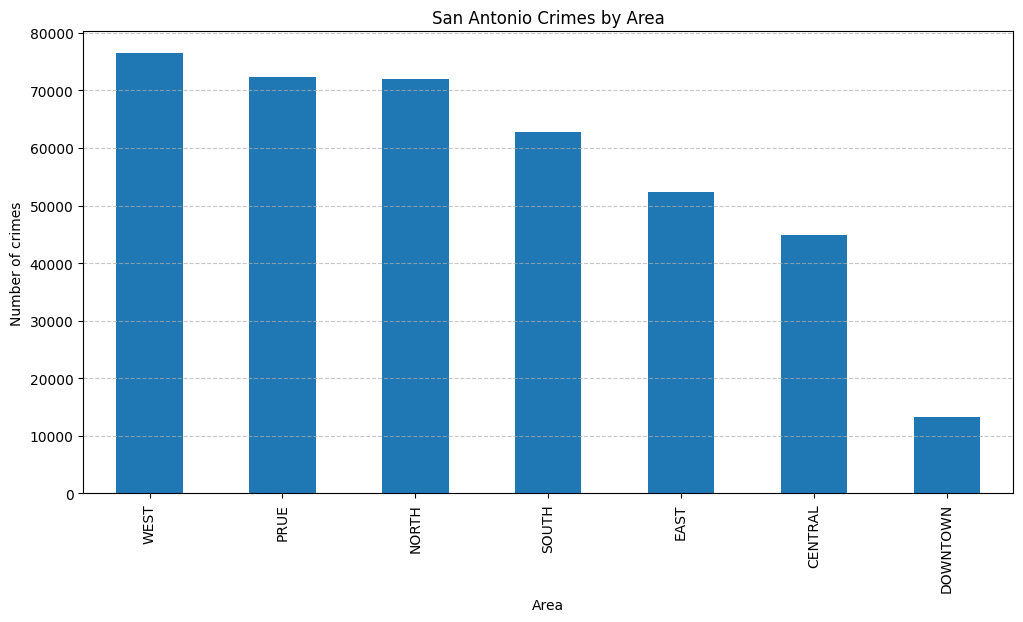

In [41]:
crime_areas.plot(kind='bar', figsize=(12, 6))
plt.title('San Antonio Crimes by Area')
plt.ylabel('Number of crimes')
plt.xlabel('Area')
plt.xticks(rotation=90)
plt.grid(True, alpha=.7, linestyle='--', axis='y')
plt.show()